# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Normalization (Min Max Scaler)
from sklearn.preprocessing import MinMaxScaler

# Linear Regression
from sklearn.linear_model import LinearRegression

# Ridge Regression
from sklearn.linear_model import Ridge

# Lasso Regression
from sklearn.linear_model import Lasso

# Orthogonal Matching Pursuit
from sklearn.linear_model import OrthogonalMatchingPursuit

# Generalized Linear Model (GLM) / Tweedie Regressor
from sklearn.linear_model import TweedieRegressor

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Support Vector Machines (SVM) for Regression
from sklearn.svm import SVR

# Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron
from sklearn.neural_network import MLPRegressor

# Membuat Input X

In [2]:
X = np.random.randint(20, size=(1000,7))
X = pd.DataFrame(X)
X.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
X

,x1,x2,x3,x4,x5,x6,x7
0,10,2,5,19,5,5,14
1,15,17,15,10,19,10,8
2,0,1,0,5,19,3,13
3,19,6,18,8,0,19,8
4,11,2,9,5,14,4,10
...,...,...,...,...,...,...,...
995,3,18,5,18,0,14,10
996,12,18,9,5,11,19,3
997,10,1,10,1,6,16,19
998,15,5,19,2,19,7,7


# Membuat Output y

In [3]:
y = 5*X['x1'] + 0.1*(X['x2']**2) + 30*(X['x3']**0.5) + X['x4']*X['x5'] + 50
#y = y + np.random.randint(50, size=(1000)) - 25
y

0      262.482039
1      460.089500
2      145.100000
3      275.879221
4      265.400000
          ...    
995    164.482039
996    287.400000
997    200.968330
998    296.266968
999    361.768330
Length: 1000, dtype: float64

# Normalization (Min Max Scaler)

In [4]:
scaler = MinMaxScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = columns
X

,x1,x2,x3,x4,x5,x6,x7
0,0.526316,0.105263,0.263158,1.000000,0.263158,0.263158,0.736842
1,0.789474,0.894737,0.789474,0.526316,1.000000,0.526316,0.421053
2,0.000000,0.052632,0.000000,0.263158,1.000000,0.157895,0.684211
3,1.000000,0.315789,0.947368,0.421053,0.000000,1.000000,0.421053
4,0.578947,0.105263,0.473684,0.263158,0.736842,0.210526,0.526316
...,...,...,...,...,...,...,...
995,0.157895,0.947368,0.263158,0.947368,0.000000,0.736842,0.526316
996,0.631579,0.947368,0.473684,0.263158,0.578947,1.000000,0.157895
997,0.526316,0.052632,0.526316,0.052632,0.315789,0.842105,1.000000
998,0.789474,0.263158,1.000000,0.105263,1.000000,0.368421,0.368421


# Split Data

In [5]:
X_train = X.loc[0:799]

X_valid = X.loc[800:999]
X_valid.index = range(200)

y_train = y[0:800]

y_valid = y[800:1000]
y_valid.index = range(200)

print(X_train)
print(X_valid)
print(y_train)
print(y_valid)

           x1        x2        x3        x4        x5        x6        x7
0    0.526316  0.105263  0.263158  1.000000  0.263158  0.263158  0.736842
1    0.789474  0.894737  0.789474  0.526316  1.000000  0.526316  0.421053
2    0.000000  0.052632  0.000000  0.263158  1.000000  0.157895  0.684211
3    1.000000  0.315789  0.947368  0.421053  0.000000  1.000000  0.421053
4    0.578947  0.105263  0.473684  0.263158  0.736842  0.210526  0.526316
..        ...       ...       ...       ...       ...       ...       ...
795  0.421053  0.000000  0.842105  0.842105  0.368421  0.263158  0.473684
796  0.105263  0.842105  0.473684  0.000000  0.315789  0.578947  0.578947
797  0.842105  0.105263  0.578947  0.947368  0.368421  1.000000  0.052632
798  0.473684  0.947368  0.526316  0.368421  0.947368  0.684211  0.684211
799  0.157895  0.842105  0.736842  0.578947  0.263158  0.210526  0.368421

[800 rows x 7 columns]
           x1        x2        x3        x4        x5        x6        x7
0    0.000000 

# Linear Regression

Mean absolute percentage error (MAPE): 0.10
Root mean squared error (RMSE): 32.01
Coefficient of determination (R2): 0.87
-16.81140373420169
[ 94.33969342  34.56764565 113.70717625 184.04190249 180.04882173
   2.54878618  -0.84933874]


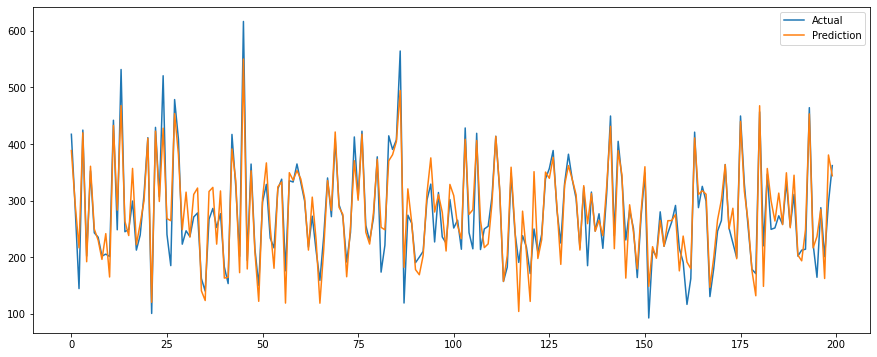

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Ridge Regression

Mean absolute percentage error (MAPE): 0.10
Root mean squared error (RMSE): 33.11
Coefficient of determination (R2): 0.86
16.7215100753545
[ 83.58466958  32.19976935 101.29694421 162.43456723 160.46580637
   1.75899476  -1.05928866]


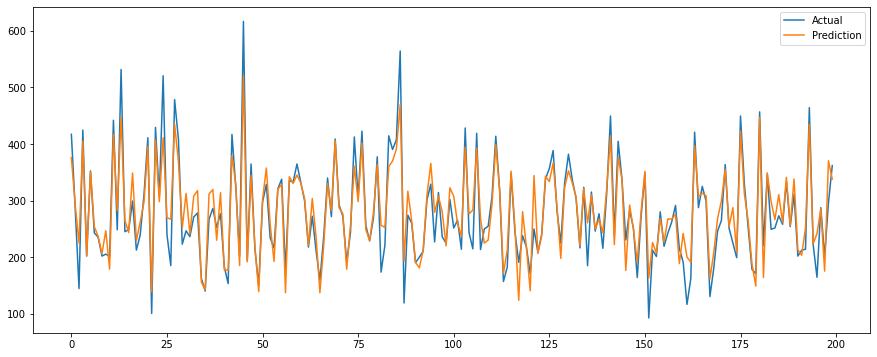

In [19]:
model = Ridge(alpha=10)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Lasso Regression

Mean absolute percentage error (MAPE): 0.14
Root mean squared error (RMSE): 44.09
Coefficient of determination (R2): 0.76
100.04874957833846
[ 43.17730615   0.          65.24244176 129.80868289 134.16710924
   0.          -0.        ]


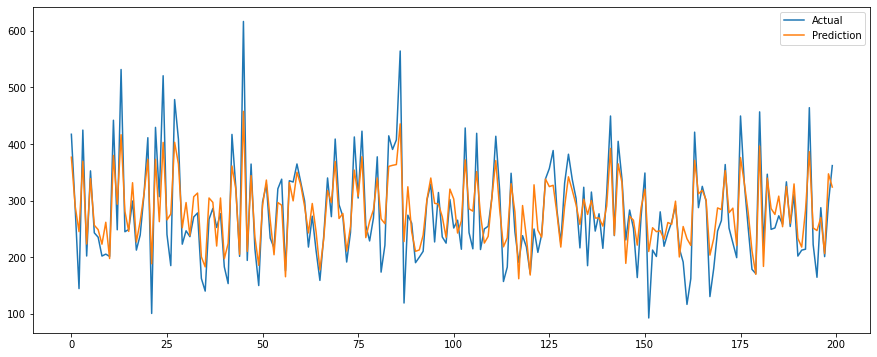

In [22]:
model = Lasso(alpha=5)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Orthogonal Matching Pursuit

Mean absolute percentage error (MAPE): 0.11
Root mean squared error (RMSE): 34.02
Coefficient of determination (R2): 0.86
-1.0701628515843709
[ 95.69816493   0.         115.32281714 183.32435633 182.15090508
   0.           0.        ]


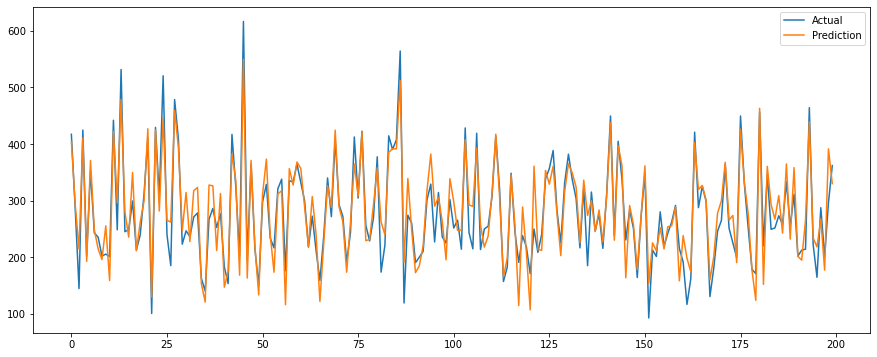

In [9]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=4)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Generalized Linear Model (GLM) / Tweedie Regressor

Mean absolute percentage error (MAPE): 0.09
Root mean squared error (RMSE): 27.52
Coefficient of determination (R2): 0.91
4.576950471247007
[3.22509854e-01 1.11047599e-01 3.90157782e-01 6.18871476e-01
 6.07594503e-01 1.45145868e-02 3.89717256e-04]


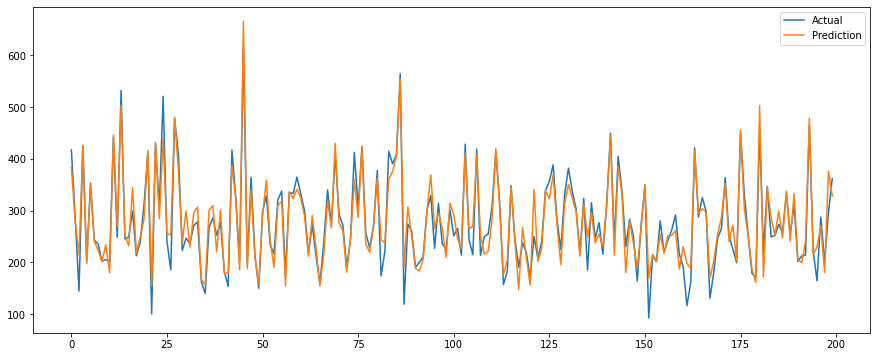

In [10]:
model = TweedieRegressor(power=1, alpha=1)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Polynomial Regression

## Dengan Pipeline

Mean absolute percentage error (MAPE): 0.01
Root mean squared error (RMSE): 3.16
Coefficient of determination (R2): 1.00


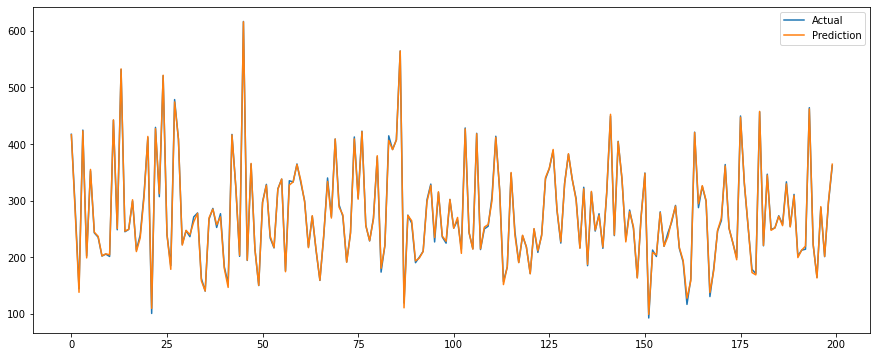

In [11]:
model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

## Tanpa Pipeline (Manual)

           x1        x2        x3        x4        x5        x6        x7
0    0.526316  0.105263  0.263158  1.000000  0.263158  0.263158  0.736842
1    0.789474  0.894737  0.789474  0.526316  1.000000  0.526316  0.421053
2    0.000000  0.052632  0.000000  0.263158  1.000000  0.157895  0.684211
3    1.000000  0.315789  0.947368  0.421053  0.000000  1.000000  0.421053
4    0.578947  0.105263  0.473684  0.263158  0.736842  0.210526  0.526316
..        ...       ...       ...       ...       ...       ...       ...
795  0.421053  0.000000  0.842105  0.842105  0.368421  0.263158  0.473684
796  0.105263  0.842105  0.473684  0.000000  0.315789  0.578947  0.578947
797  0.842105  0.105263  0.578947  0.947368  0.368421  1.000000  0.052632
798  0.473684  0.947368  0.526316  0.368421  0.947368  0.684211  0.684211
799  0.157895  0.842105  0.736842  0.578947  0.263158  0.210526  0.368421

[800 rows x 7 columns]
           x1        x2        x3        x4        x5        x6        x7  \
0    0.5263

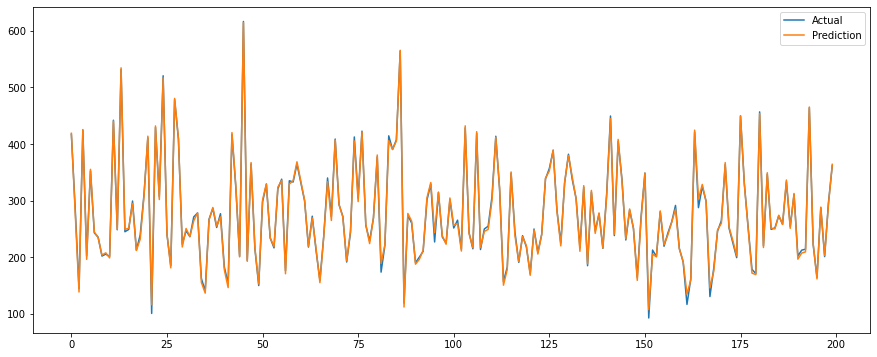

In [12]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

X_train_poly = pd.DataFrame(X_train_poly)
X_valid_poly = pd.DataFrame(X_valid_poly)

X_train_poly.columns = poly.get_feature_names(X_train.columns)
X_valid_poly.columns = poly.get_feature_names(X_train.columns)

print(X_train)
print(X_train_poly)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_valid_pred = model.predict(X_valid_poly)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Support Vector Machines (SVM) for Regression

Mean absolute percentage error (MAPE): 0.06
Root mean squared error (RMSE): 21.95
Coefficient of determination (R2): 0.94


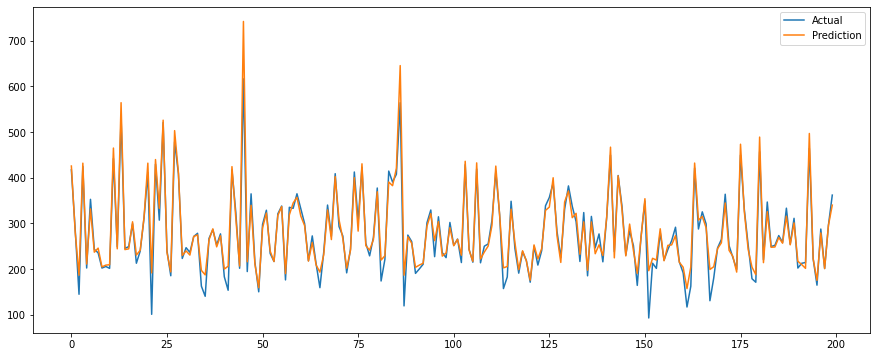

In [13]:
model = SVR(kernel='poly')
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Nearest Neighbors

Mean absolute percentage error (MAPE): 0.08
Root mean squared error (RMSE): 27.16
Coefficient of determination (R2): 0.91


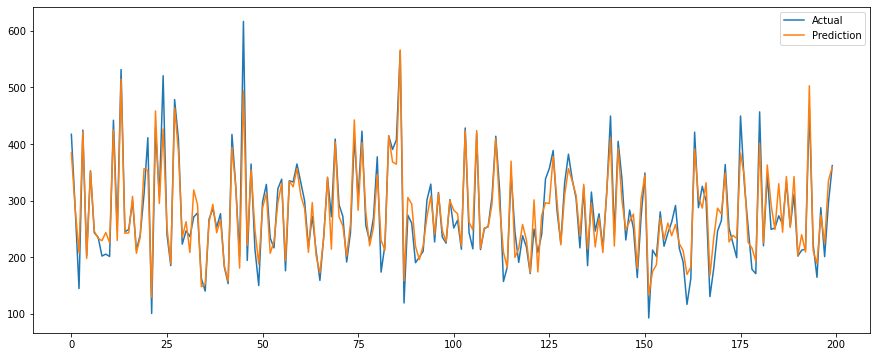

In [14]:
model = KNeighborsRegressor(n_neighbors=5, weights='distance')
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Multi-layer Perceptron

C:\anaconda1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean absolute percentage error (MAPE): 0.01
Root mean squared error (RMSE): 4.65
Coefficient of determination (R2): 1.00


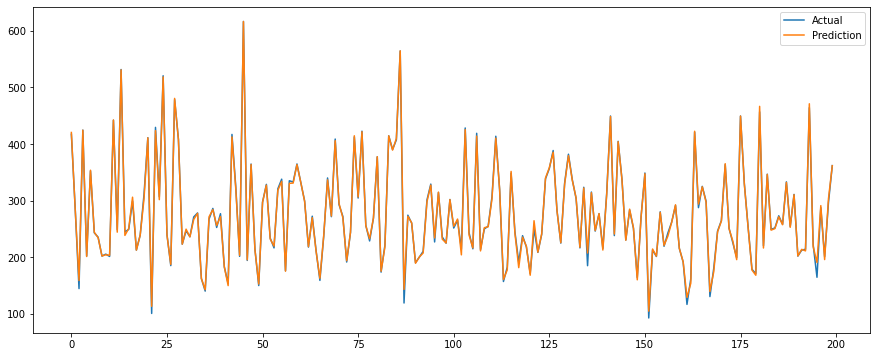

In [15]:
model = MLPRegressor(hidden_layer_sizes=(100), activation='logistic', solver='adam', max_iter=10000)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()